In [145]:
import math 
import statistics 
import numpy as np 
import scipy.stats 
import pandas as pd

import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import seaborn as sns

from scipy.stats import uniform
from scipy.stats import norm

## Explatory data analysis

In [146]:
Prop_sell_in_NYC =  pd.read_csv('nyc-rolling-sales.csv',na_values=[' -  '])

Prop_sell_in_NYC.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].agg('sum').head()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        18648
02 TWO FAMILY DWELLINGS                        32451
03 THREE FAMILY DWELLINGS                      13137
04 TAX CLASS 1 CONDOS                           1630
05 TAX CLASS 1 VACANT LAND                       245
Name: TOTAL UNITS, dtype: int64

In [147]:
print(Prop_sell_in_NYC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

## Pengumplan data dan penjelasan terhadap total units yang dibangun pada kelompok
buliding category Apartement 
ELEVATOR APT; FIREPROOF WITHOUT STORES dan ELEVATOR APT; SEMI-FIREPROOF WITH STORES
di seluruh borough dalam data nyc-rolling-sales


kode borough

- Manhattan (1), 
- Bronx (2), 
- Brooklyn (3), 
- Queens (4), and 
- Staten Island (5).


In [148]:
df_elev_with_stores = Prop_sell_in_NYC[Prop_sell_in_NYC['BUILDING CLASS AT PRESENT']=='D7']
df_elev_without_stores = Prop_sell_in_NYC[Prop_sell_in_NYC['BUILDING CLASS AT PRESENT']=='D3']

df_data_apt=pd.concat([df_elev_with_stores,df_elev_without_stores],sort=False)

In [149]:
print(df_data_apt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 10 to 66238
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      123 non-null    int64  
 1   BOROUGH                         123 non-null    int64  
 2   NEIGHBORHOOD                    123 non-null    object 
 3   BUILDING CLASS CATEGORY         123 non-null    object 
 4   TAX CLASS AT PRESENT            123 non-null    object 
 5   BLOCK                           123 non-null    int64  
 6   LOT                             123 non-null    int64  
 7   EASE-MENT                       123 non-null    object 
 8   BUILDING CLASS AT PRESENT       123 non-null    object 
 9   ADDRESS                         123 non-null    object 
 10  APARTMENT NUMBER                123 non-null    object 
 11  ZIP CODE                        123 non-null    int64  
 12  RESIDENTIAL UNITS               1

<AxesSubplot:xlabel='BUILDING CLASS AT PRESENT,BOROUGH'>

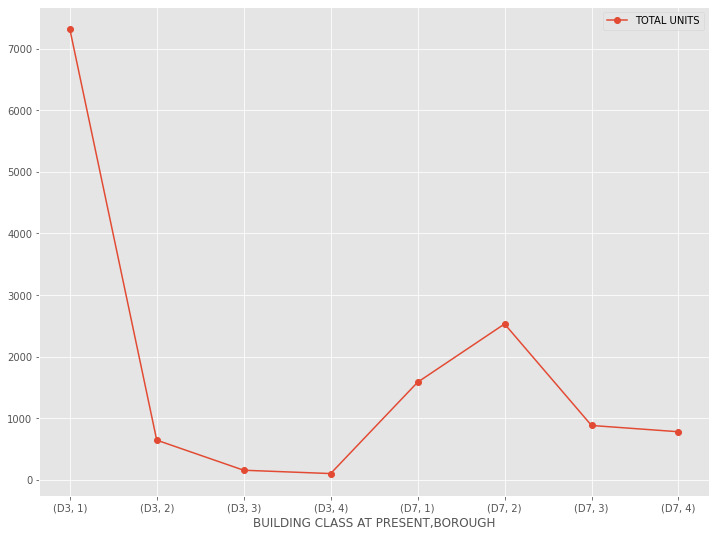

In [150]:
pd.DataFrame(df_data_apt.groupby(['BUILDING CLASS AT PRESENT','BOROUGH'])['TOTAL UNITS'].sum()).plot(figsize=(12,9),marker='o')

In [151]:
df_data_apt[df_data_apt['BOROUGH']==1].head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
10,14,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,394,44,,D7,181 AVENUE C,...,30,4,34,4295.0,21328.0,1910,2,D7,NaN,2017-07-20 00:00:00
239,243,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2,794,11,,D7,155 WEST 18TH,...,30,2,32,10053.0,78882.0,2014,2,D7,2341975.0,2016-10-28 00:00:00
1123,1127,1,CIVIC CENTER,08 RENTALS - ELEVATOR APARTMENTS,2B,124,10,,D7,23 PARK PLACE,...,6,1,7,4400.0,21840.0,1915,2,D7,15000000.0,2017-05-19 00:00:00
1124,1128,1,CIVIC CENTER,08 RENTALS - ELEVATOR APARTMENTS,2,173,17,,D7,74 LEONARD STREET,...,18,1,19,3828.0,24423.0,1920,2,D7,21250000.0,2017-05-25 00:00:00
1971,1975,1,FASHION,08 RENTALS - ELEVATOR APARTMENTS,2,830,45,,D7,264 5 AVENUE,...,14,6,20,2975.0,13875.0,1928,2,D7,NaN,2016-12-19 00:00:00


## Mencari data:
    - Mean
    - Median
    - Modus
    - Range
    - Standard Deviation
    - Variance
    

In [152]:
df_data_apt['TOTAL UNITS'].mean()

#113.70 adalah rata-rata total units dari buliding category Apartement 
#ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

113.69918699186992

In [153]:
df_data_apt['TOTAL UNITS'].median()

# 63.0 adalah nilai tengah dari total units
#ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

63.0

In [154]:
df_data_apt['TOTAL UNITS'].std()

#standard deviasi total units 
#ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

158.77073557410833

In [155]:
df_data_apt['TOTAL UNITS'].var(ddof=0)    

#variance dari population  
#ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

25003.202194460962

In [156]:
statistics.mode(df_data_apt['TOTAL UNITS'])   

# mode total units
#ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

64

## ranges data total units
ELEVATOR APT; FIREPROOF WITHOUT STORES ELEVATOR APT; SEMI-FIREPROOF WITH STORES

In [157]:
np.ptp(df_data_apt['TOTAL UNITS'])


949

In [158]:
max(df_data_apt['TOTAL UNITS']) - min(df_data_apt['TOTAL UNITS'])

949

## Probability Distribution 
    Total Units dari apartment dengan building category ELEVATOR APT; FIREPROOF WITHOUT STORES dan ELEVATOR APT; SEMI-FIREPROOF WITH STORES di seluruh borough dalam data nyc-rolling-sales
 - Uniform
 - Normal
 

In [159]:
n= df_data_apt['TOTAL UNITS'].sum()

start = 10
width = 20 
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
data_normal = norm.rvs(size=n, loc = start, scale=width)

C:\Users\Dimas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

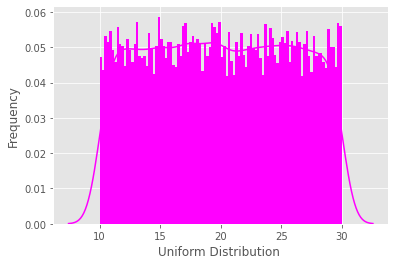

In [160]:
ax = sns.distplot(
        data_uniform, 
        bins=100, 
        kde=True, 
        color='magenta', 
        hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')



C:\Users\Dimas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution '), Text(0, 0.5, 'Frequency')]

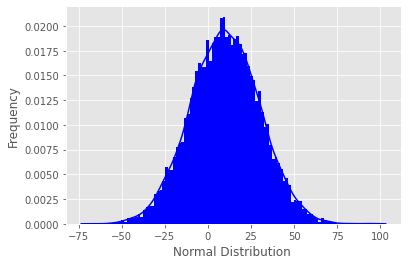

In [161]:
ax = sns.distplot(
        data_normal, 
        bins=100, 
        kde=True, 
        color='blue', 
        hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution ', ylabel='Frequency')


## Confidence Interval

In [162]:
df_four_borough = df_data_apt[['BOROUGH','BUILDING CLASS AT PRESENT','TOTAL UNITS']]
df_four_borough['TOTALUNITS'] = df_data_apt['TOTAL UNITS']
df_four_borough['Build'] = df_data_apt['BUILDING CLASS AT PRESENT']



C:\Users\Dimas\AppData\Local\Temp\ipykernel_10316\1757340735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_four_borough['TOTALUNITS'] = df_data_apt['TOTAL UNITS']
C:\Users\Dimas\AppData\Local\Temp\ipykernel_10316\1757340735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_four_borough['Build'] = df_data_apt['BUILDING CLASS AT PRESENT']


In [163]:
df_four_borough.groupby(['Build','BOROUGH'])['TOTALUNITS'].sum()

Build  BOROUGH
D3     1          7322
       2           642
       3           153
       4            99
D7     1          1582
       2          2529
       3           880
       4           778
Name: TOTALUNITS, dtype: int64

In [164]:
n = 7322 + 1582
p = 7322 / n
z = 1.96
se = np.sqrt(p * (1-p) / n)

be = p
me = z * se

print("Confidence Interval")
print(be - me)
print(be + me)

Confidence Interval
0.8143874838211981
0.8302666042291164


proporsi total units Apartment di manhattan dengan kode D3 (ELEVATOR APT; FIREPROOF WITHOUT STORES) ada diantara 81%-84% dengan tingkat keyakinan 95 %
 - (sumber data nyc-rolling-sales.csv)

HYPOTHESIS TESTING
 - membandingkan total units apartment dengan kriteria D3 (ELEVATOR APT; FIREPROOF WITHOUT STORES) borough Bronx dan Brooklyn 
 - Total Unit Apartment dengan kriteria D3 lebih banyak di bronx

In [165]:
Total_Bronx= df_four_borough[
    (df_four_borough['Build'] == 'D3') &
    (df_four_borough['BOROUGH'] ==2)]
    
    
Total_Brooklyn= df_four_borough[
    (df_four_borough['Build'] == 'D3') &
    (df_four_borough['BOROUGH'] ==3)]
  


In [166]:
zstat, pvalue = sm.stats.ztest(Total_Bronx['TOTALUNITS'], Total_Brooklyn['TOTALUNITS'], alternative='two-sided')
print(pvalue)
# pilih alpha
alpha = 0.05 # level yakin 95%, error rate 5%

print(pvalue < alpha)


if (pvalue < alpha):
    print("REJECT null hypothesis, Total Unit Apartment dengan kriteria D3 lebih banyak di bronx daripada Brooklyn")
else:
    print("FAIL to reject null hypothesis, tidak ada perbedaan signifikan Total Unit Apartment dengan kriteria D3 di bronx daripada Brooklyn ")

4.506726813010145e-11
True
REJECT null hypothesis, Total Unit Apartment dengan kriteria D3 lebih banyak di bronx daripada Brooklyn
